# Box-Cox transformation

In [1]:
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import fetch_california_housing

# with open-source packages
from sklearn.preprocessing import PowerTransformer

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# drop lat and lon
X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

# display top 5 rows
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467

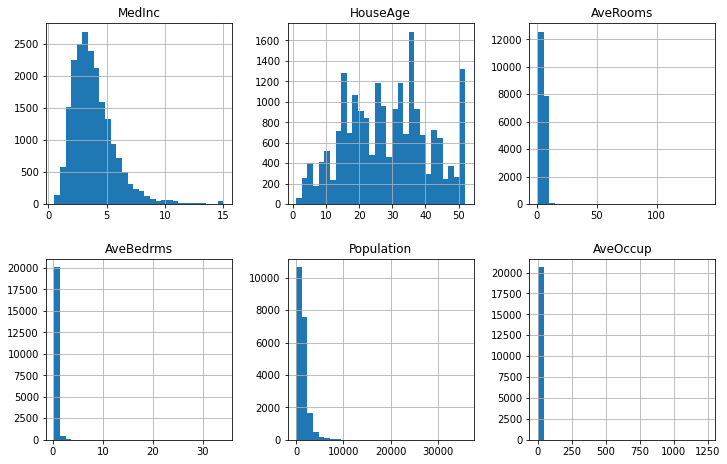

In [3]:
# Plot histograms to inspect variable distributions

X.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

In [4]:
# capture variable names in a list

variables = list(X.columns)

variables

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [5]:
# Make Q-Q plots for all variables


def make_qqplot(df):

    plt.figure(figsize=(10, 6), constrained_layout=True)

    for i in range(6):

        # location in figure
        ax = plt.subplot(2, 3, i + 1)

        # variable to plot
        var = variables[i]

        # q-q plot
        stats.probplot((df[var]), dist="norm", plot=plt)

        # add variable name as title
        ax.set_title(var)

    plt.show()

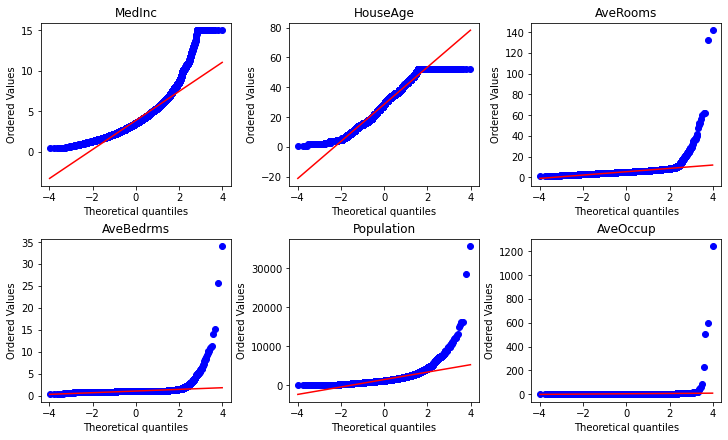

In [6]:
make_qqplot(X)

# Box-Cox transformation with Scikit-learn

In [7]:
# initialize the transformer with box-cox

transformer = PowerTransformer(method="box-cox", standardize=False)

transformer.set_output(transform="pandas")

PowerTransformer(method='box-cox', standardize=False)

In [8]:
# fit transformer: transformer will learn the lambdas

transformer.fit(X)

PowerTransformer(method='box-cox', standardize=False)

In [9]:
# lambdas are stored in a transformer attribute

transformer.lambdas_

array([ 0.09085449,  0.80939809, -0.2980049 , -1.62900026,  0.23576758,
       -0.47630323])

In [10]:
# transform data: returns NumPy array

X_tf = transformer.transform(X)

X_tf

MedInc   HouseAge  AveRooms  AveBedrms  Population  AveOccup
0      2.337069  23.723216  1.475350   0.023085   12.308116  0.756645
1      2.333598  13.286954  1.410978  -0.029195   22.335341  0.628291
2      2.171691  29.017459  1.568866   0.066936   14.082654  0.814315
3      1.873879  29.017459  1.370082   0.066615   14.598635  0.754737
4      1.432988  29.017459  1.415020   0.073214   14.654092  0.651500
...         ...        ...       ...        ...         ...       ...
20635  0.453991  15.488038  1.284035   0.113228   16.535104  0.757908
20636  0.979953  11.583480  1.399297   0.221297   12.704453  0.878932
20637  0.543627  11.003934  1.303230   0.103551   17.412274  0.694971
20638  0.642493  11.583480  1.317575   0.139802   15.901621  0.632710
20639  0.906074  10.417849  1.308972   0.133369   19.110083  0.771752

[20640 rows x 6 columns]

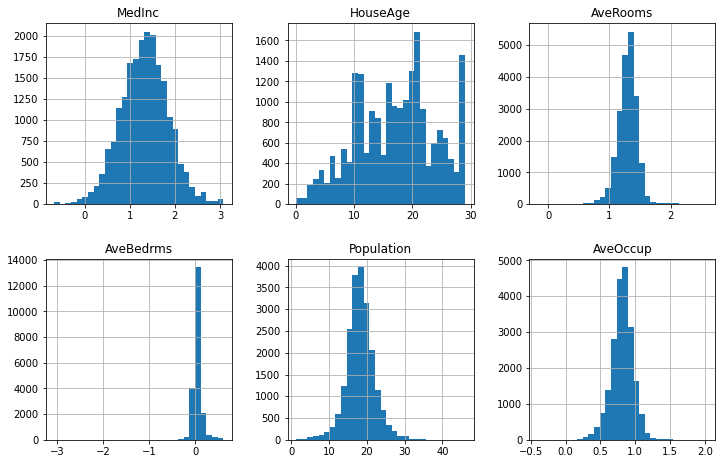

In [11]:
# Plot histograms to inspect variable distributions

X_tf.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

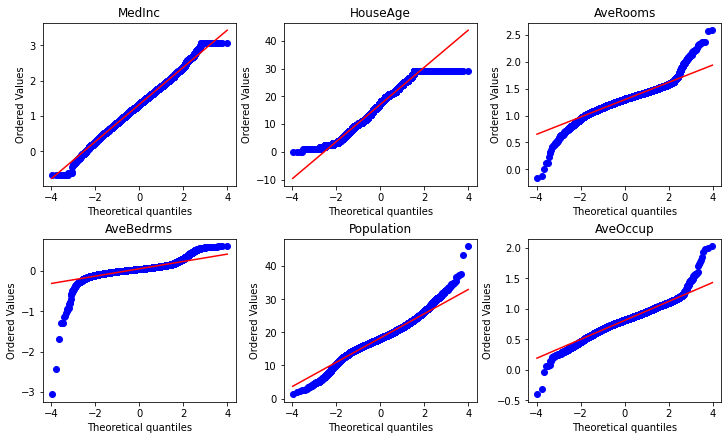

In [12]:
# Make Q-Q plots for all variables

make_qqplot(X_tf)